In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [41]:
df17=pd.read_csv('daily-shelter-occupancy-2017-csv.csv')
df18=pd.read_csv('daily-shelter-occupancy-2018-csv.csv')
df19=pd.read_csv('daily-shelter-occupancy-2019-csv.csv')

In [42]:
df=pd.concat([df17,df18,df19])
df.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0


In [43]:
df.isnull().sum()

_id                       0
OCCUPANCY_DATE            0
ORGANIZATION_NAME         0
SHELTER_NAME              0
SHELTER_ADDRESS           0
SHELTER_CITY              0
SHELTER_PROVINCE          0
SHELTER_POSTAL_CODE    5494
FACILITY_NAME             0
PROGRAM_NAME              0
SECTOR                    0
OCCUPANCY                 0
CAPACITY                343
dtype: int64

In [44]:
df['SHELTER_CITY'].unique()

array(['Toronto', 'North York', 'Scarborough', 'Etobicoke'], dtype=object)

In [45]:
df['SECTOR'].unique()

array(['Co-ed', 'Men', 'Families', 'Women', 'Youth'], dtype=object)

In [46]:
df['SHELTER_NAME'].unique().size

65

In [193]:
import datetime
df['Month_Year']=pd.to_datetime(df['OCCUPANCY_DATE']).dt.to_period('M')
df.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY,Month_Year
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0,2017-01
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0,2017-01
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0,2017-01
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0,2017-01
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0,2017-01


In [269]:
dfCrime=pd.read_csv('MCI_2014_to_2019.csv')
dfCrime.isnull().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64

In [270]:
dfCrime.drop(columns = ['X','Y','Index_','ucr_code','ucr_ext','reportedyear','reportedmonth','reportedday','reporteddayofyear',
                        'reporteddayofweek','occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek',
                        'Division','Hood_ID', 'ObjectId'],inplace =True)

In [271]:
dfCrime.isnull().sum()

event_unique_id    0
occurrencedate     0
reporteddate       0
premisetype        0
offence            0
reportedhour       0
occurrencehour     0
MCI                0
Neighbourhood      0
Long               0
Lat                0
dtype: int64

In [274]:
dfCrime['Reported_Month_Year'] = pd.to_datetime(dfCrime['reporteddate']).dt.to_period('M')
dfCrime['Occurence_Month_Year'] = pd.to_datetime(dfCrime['occurrencedate']).dt.to_period('M')
dfCrime.head()

C:\Users\steve\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


,event_unique_id,occurrencedate,reporteddate,premisetype,offence,reportedhour,occurrencehour,MCI,Neighbourhood,Long,Lat,Reported_Month_Year,Occurence_Month_Year
0,GO-20141756319,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,Assault,3,1,Assault,Malvern (132),-79.199081,43.800281,2014-03,2014-03
1,GO-20143006885,2014/09/27 00:00:00+00,2014/09/29 00:00:00+00,Other,B&E,10,16,Break and Enter,Bay Street Corridor (76),-79.386383,43.662472,2014-09,2014-09
2,GO-20141756802,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Commercial,B&E,7,6,Break and Enter,West Humber-Clairville (1),-79.612595,43.720406,2014-03,2014-03
3,GO-20141760570,2014/03/24 00:00:00+00,2014/03/24 00:00:00+00,Apartment,B&E,23,15,Break and Enter,Don Valley Village (47),-79.349121,43.782772,2014-03,2014-03
4,GO-20142004859,2014/05/03 00:00:00+00,2014/05/03 00:00:00+00,Commercial,Robbery - Business,2,2,Robbery,Junction Area (90),-79.458778,43.664490,2014-05,2014-05


In [275]:
dfCrime['MCI'].value_counts()

Assault            111423
Break and Enter     43302
Auto Theft          23380
Robbery             21543
Theft Over           6787
Name: MCI, dtype: int64

In [281]:
dfCrime['offence'].value_counts()

Assault                           76124
B&E                               36305
Theft Of Motor Vehicle            23380
Assault With Weapon               18168
Robbery - Mugging                  6847
B&E W'Intent                       5630
Assault Bodily Harm                5104
Theft Over                         3906
Assault Peace Officer              3581
Robbery With Weapon                3578
Robbery - Other                    3533
Robbery - Business                 2434
Assault - Resist/ Prevent Seiz     2376
Robbery - Swarming                 1947
Aggravated Assault                 1864
Theft From Motor Vehicle Over      1590
Discharge Firearm With Intent      1369
Unlawfully In Dwelling-House       1272
Discharge Firearm - Recklessly      896
Robbery - Purse Snatch              835
Robbery - Home Invasion             830
Pointing A Firearm                  737
Theft From Mail / Bag / Key         699
Robbery - Financial Institute       644
Theft Over - Shoplifting            384


In [276]:
table = pd.pivot_table(dfCrime, values = 'event_unique_id',index=['Reported_Month_Year'], columns=['MCI'], aggfunc='count')
table

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
Reported_Month_Year,,,,,
2014-01,1188,224,582,275,75
2014-02,1163,245,483,281,67
2014-03,1228,285,573,285,59
2014-04,1232,295,628,291,77
2014-05,1502,292,611,357,94
...,...,...,...,...,...
2019-08,1800,426,769,312,123
2019-09,1751,430,689,251,120
2019-10,1788,515,768,369,139


In [277]:
x = table['Assault']
len(x)

72

In [278]:
y = table['Assault']['2017-01'::]
len(y)

36

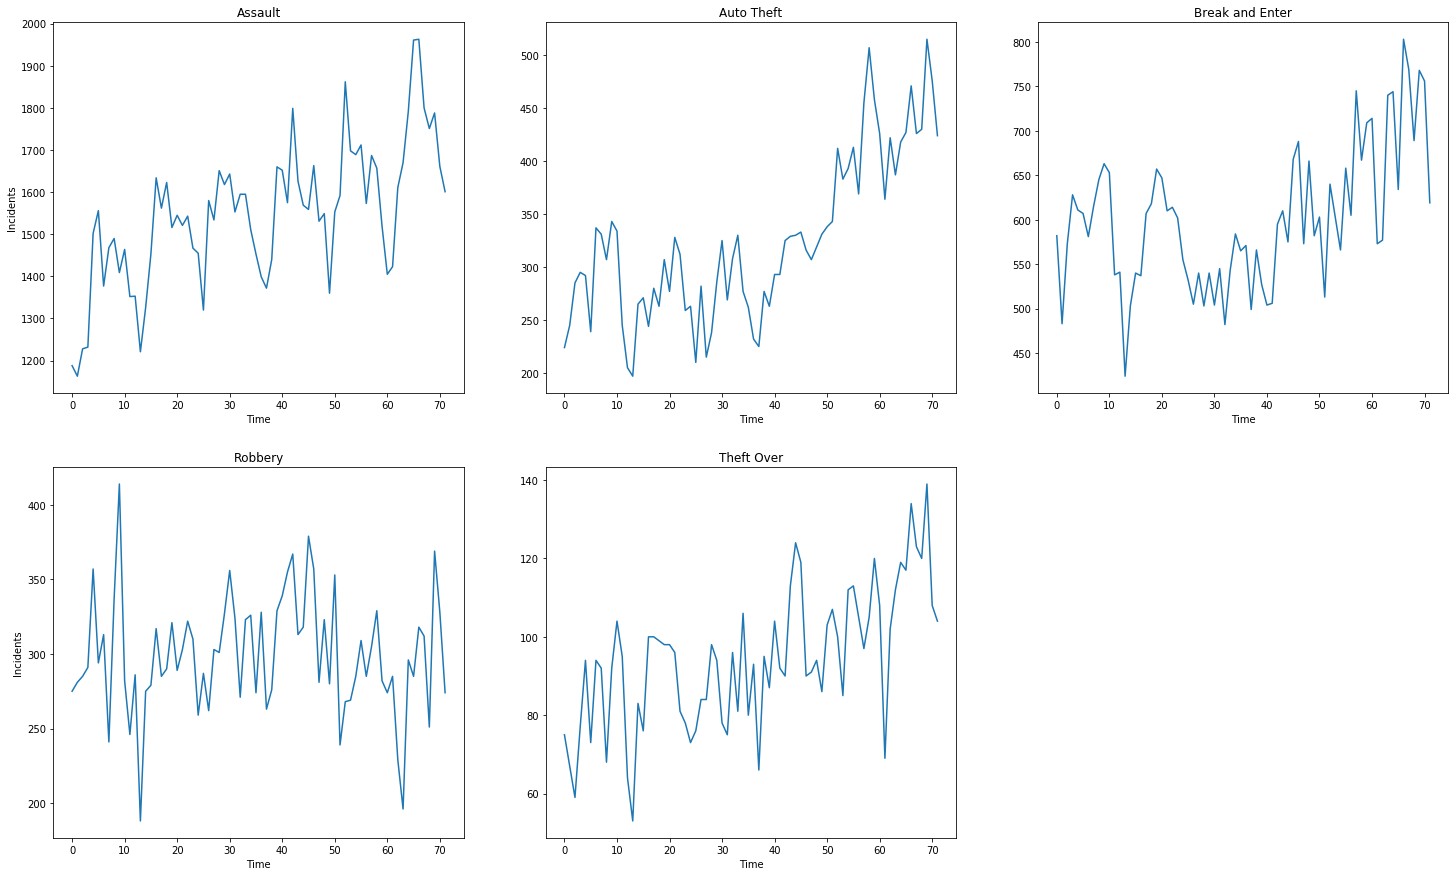

In [279]:

x = list(range(72))

fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(231)
ax1.set(title='Assault')
ax1.plot(x, table['Assault'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(232)
ax1.set(title='Auto Theft')
ax1.plot(x, table['Auto Theft'])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(233)
ax1.set(title='Break and Enter')
ax1.plot(x, table['Break and Enter'])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(234)
ax1.set(title='Robbery')
ax1.plot(x, table['Robbery'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(235)
ax1.set(title='Theft Over')
ax1.plot(x, table['Theft Over'])
ax1.set_xlabel('Time')


plt.show()

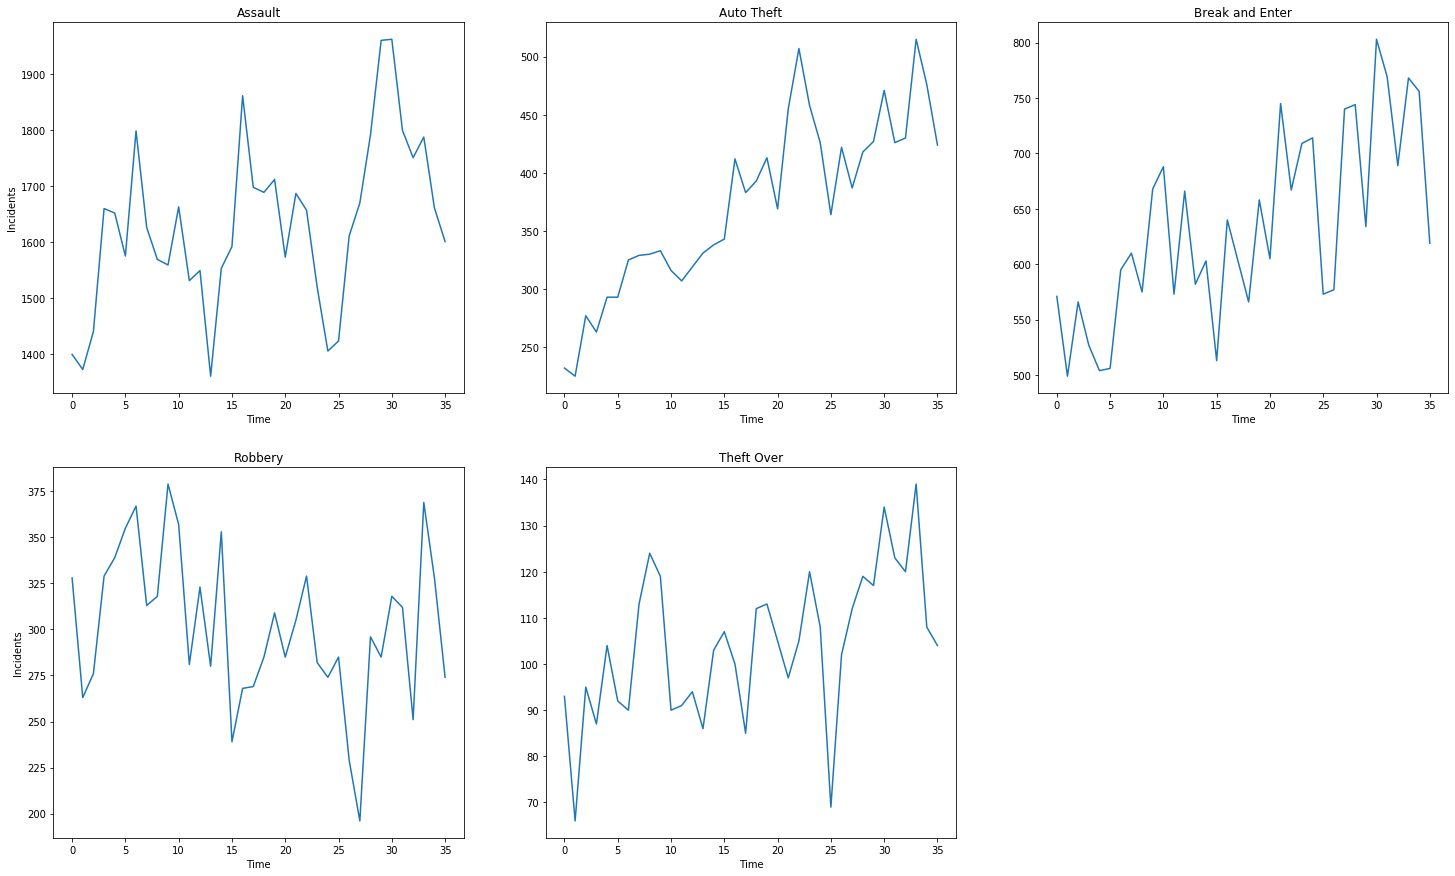

In [280]:
y = table['Assault']['2017-01'::]
x = list(range(72))
x1= list(range(36))

fig = plt.figure(figsize=(25,15))

ax1 = fig.add_subplot(231)
ax1.set(title='Assault')
ax1.plot(x1, table['Assault']['2017-01'::])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(232)
ax1.set(title='Auto Theft')
ax1.plot(x1, table['Auto Theft']['2017-01'::])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(233)
ax1.set(title='Break and Enter')
ax1.plot(x1, table['Break and Enter']['2017-01'::])
ax1.set_xlabel('Time')

ax1 = fig.add_subplot(234)
ax1.set(title='Robbery')
ax1.plot(x1, table['Robbery']['2017-01'::])
ax1.set_xlabel('Time')
ax1.set_ylabel('Incidents')

ax1 = fig.add_subplot(235)
ax1.set(title='Theft Over')
ax1.plot(x1, table['Theft Over']['2017-01'::])
ax1.set_xlabel('Time')


plt.show()

In [282]:
dfCrime['offence'].value_counts()

Assault                           76124
B&E                               36305
Theft Of Motor Vehicle            23380
Assault With Weapon               18168
Robbery - Mugging                  6847
B&E W'Intent                       5630
Assault Bodily Harm                5104
Theft Over                         3906
Assault Peace Officer              3581
Robbery With Weapon                3578
Robbery - Other                    3533
Robbery - Business                 2434
Assault - Resist/ Prevent Seiz     2376
Robbery - Swarming                 1947
Aggravated Assault                 1864
Theft From Motor Vehicle Over      1590
Discharge Firearm With Intent      1369
Unlawfully In Dwelling-House       1272
Discharge Firearm - Recklessly      896
Robbery - Purse Snatch              835
Robbery - Home Invasion             830
Pointing A Firearm                  737
Theft From Mail / Bag / Key         699
Robbery - Financial Institute       644
Theft Over - Shoplifting            384


In [284]:
tableShelter = pd.pivot_table(df, values = 'OCCUPANCY',index=['Month_Year'], aggfunc='sum')
tableShelter

,OCCUPANCY
Month_Year,
2017-01,140991
2017-02,128765
2017-03,144607
2017-04,143358
2017-05,149671
2017-06,146298
2017-07,151773
2017-08,153550
2017-09,150173


In [288]:
tableCombined = table['2017-01'::]
tableCombined['Shelter'] = tableShelter
tableCombined

C:\Users\steve\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Shelter
Reported_Month_Year,,,,,,
2017-01,1399,232,571,328,93,140991
2017-02,1372,225,499,263,66,128765
2017-03,1440,277,566,276,95,144607
2017-04,1660,263,527,329,87,143358
2017-05,1652,293,504,339,104,149671
2017-06,1575,293,506,355,92,146298
2017-07,1799,325,595,367,90,151773
2017-08,1626,329,610,313,113,153550
2017-09,1569,330,575,318,124,150173


In [292]:
tableCombined.corr()

MCI,Assault,Auto Theft,Break and Enter,Robbery,Theft Over,Shelter
MCI,,,,,,
Assault,1.000000,0.537671,0.473153,0.117851,0.553172,0.487764
Auto Theft,0.537671,1.000000,0.745260,-0.110473,0.617381,0.881184
Break and Enter,0.473153,0.745260,1.000000,0.074538,0.613222,0.658317
Robbery,0.117851,-0.110473,0.074538,1.000000,0.110526,-0.377145
Theft Over,0.553172,0.617381,0.613222,0.110526,1.000000,0.513719
Shelter,0.487764,0.881184,0.658317,-0.377145,0.513719,1.000000
